# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Three Observable Trends

1. Linear regression plots indicate that max temperature and latitude in the northern hemisphere have a strong negative correlation, indicating that as latitude increases, maximum temperature decreases. For cities in the southern hemisphere, max temperature and latitude have a moderate positive correlation, indicating that as latitude increases, maximum temperature also slightly increases. These observations show that maximum temperatures decrease for cities further away from the equator.
2. R-value results appear to indicate that humidity and latitude in both the northern and southern hemispheres have a moderate positive correlation, implying that the humidity slightly increases as latitude increases.
3. Linear regression indicates that there is no relationship between wind speed and latitude in the northern hemisphere, as these factors have a very low r-value of 0.01.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set new city list for use in creating city weather data.
# Set city number and set number for looping.
# Set all lists to store location and weather data from response.
weather_cities = []
lat = []
lng = []
max_temp = []
humid = [] 
cloud = []
wind_speed = []
country = []
date = []
city_number = 0
set_number = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:    
    city_number = city_number + 1
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        weather_cities.append(city)
        print(f"Processing Record {city_number} of Set {set_number} | {city}")
    except:
        print("City not found. Skipping...")
    
    if (city_number)%(50) == 0:
        set_number = set_number + 1
        city_number = 0
        time.sleep(60)

Processing Record 1 of Set 1 | lavrentiya
Processing Record 2 of Set 1 | coahuayana
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | komsomolskiy
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | hithadhoo
City not found. Skipping...
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | panguna
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | muros
Processing Record 18 of Set 1 | kotma
Processing Record 19 of Set 1 | constitucion
Processing Record 20 of Set 1 | crotone
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | sayyan
Processing Record 23 of Set 1 | saint-philippe
Processing Record 24 of Set 1 | cidreira
Processing Record 25 of Set 1 |

Processing Record 5 of Set 5 | comodoro rivadavia
Processing Record 6 of Set 5 | airai
Processing Record 7 of Set 5 | dingle
City not found. Skipping...
Processing Record 9 of Set 5 | henties bay
Processing Record 10 of Set 5 | sun valley
Processing Record 11 of Set 5 | tessalit
Processing Record 12 of Set 5 | aklavik
Processing Record 13 of Set 5 | kavieng
Processing Record 14 of Set 5 | kuusamo
Processing Record 15 of Set 5 | saldanha
Processing Record 16 of Set 5 | bulungu
Processing Record 17 of Set 5 | kandi
Processing Record 18 of Set 5 | harper
City not found. Skipping...
Processing Record 20 of Set 5 | tuktoyaktuk
Processing Record 21 of Set 5 | champerico
City not found. Skipping...
Processing Record 23 of Set 5 | hun
Processing Record 24 of Set 5 | teavaro
Processing Record 25 of Set 5 | clyde river
Processing Record 26 of Set 5 | denpasar
Processing Record 27 of Set 5 | noumea
Processing Record 28 of Set 5 | zhangzhou
Processing Record 29 of Set 5 | guerrero negro
Processing

Processing Record 11 of Set 9 | mikhaylovka
Processing Record 12 of Set 9 | pachora
Processing Record 13 of Set 9 | point pleasant
Processing Record 14 of Set 9 | margate
Processing Record 15 of Set 9 | tual
Processing Record 16 of Set 9 | moshenskoye
City not found. Skipping...
Processing Record 18 of Set 9 | ballina
Processing Record 19 of Set 9 | kurgan
Processing Record 20 of Set 9 | saint-joseph
Processing Record 21 of Set 9 | leh
Processing Record 22 of Set 9 | carahue
Processing Record 23 of Set 9 | sur
Processing Record 24 of Set 9 | uvira
Processing Record 25 of Set 9 | carnarvon
Processing Record 26 of Set 9 | jardim
Processing Record 27 of Set 9 | zambezi
Processing Record 28 of Set 9 | skjervoy
Processing Record 29 of Set 9 | sarkand
Processing Record 30 of Set 9 | rudnya
City not found. Skipping...
Processing Record 32 of Set 9 | saint-augustin
Processing Record 33 of Set 9 | totskoye
Processing Record 34 of Set 9 | meulaboh
Processing Record 35 of Set 9 | nioro
City not f

Processing Record 14 of Set 13 | rafai
Processing Record 15 of Set 13 | kargopol
Processing Record 16 of Set 13 | eshowe
Processing Record 17 of Set 13 | cayenne
Processing Record 18 of Set 13 | palm springs
Processing Record 19 of Set 13 | lodwar
Processing Record 20 of Set 13 | phalaborwa
Processing Record 21 of Set 13 | manama
City not found. Skipping...
Processing Record 23 of Set 13 | alta floresta
Processing Record 24 of Set 13 | carutapera
Processing Record 25 of Set 13 | eucaliptus
Processing Record 26 of Set 13 | chitral
Processing Record 27 of Set 13 | pilar
Processing Record 28 of Set 13 | boo
Processing Record 29 of Set 13 | halifax
Processing Record 30 of Set 13 | riom
Processing Record 31 of Set 13 | saint pete beach
Processing Record 32 of Set 13 | nanning
City not found. Skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe with location and weather data for each city
weather_data = pd.DataFrame({
    "City": weather_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    }
)
#weather_data = pd.DataFrame(weather_dict)

# Export city data into a csv
weather_data.to_csv(output_data_file,index=False, header=True)

# Display the DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lavrentiya,65.5833,-171.0000,33.76,98,100,18.23,RU,1639968613
1,coahuayana,18.7333,-103.6833,74.34,77,63,1.70,MX,1639968613
2,bengkulu,-3.8004,102.2655,81.25,68,100,5.73,ID,1639968614
3,butaritari,3.0707,172.7902,82.15,74,95,15.61,KI,1639968614
4,ushuaia,-54.8000,-68.3000,40.66,70,40,10.36,AR,1639968614


In [5]:
weather_data[["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,21.300360,16.135172,49.191509,74.814751,61.108062,8.024580,1.639969e+09
std,33.299142,91.911841,31.170596,19.292111,39.569205,6.222376,1.652503e+02
min,-54.800000,-175.200000,-49.230000,12.000000,0.000000,0.000000,1.639968e+09
25%,-6.175800,-65.407400,30.965000,66.000000,20.000000,3.290000,1.639969e+09
50%,27.750000,19.234500,56.620000,79.000000,75.000000,6.780000,1.639969e+09
75%,48.700050,98.318750,74.490000,90.000000,100.000000,11.125000,1.639969e+09
max,78.218600,179.316700,101.070000,100.000000,100.000000,38.950000,1.639969e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [73]:
# Not applicable, as seen above that maximum humidity is 100.

In [74]:
#  Get the indices of cities that have humidity over 100%.

# Not applicable, as seen above that maximum humidity is 100.

In [75]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Not applicable, as seen above that maximum humidity is 100.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

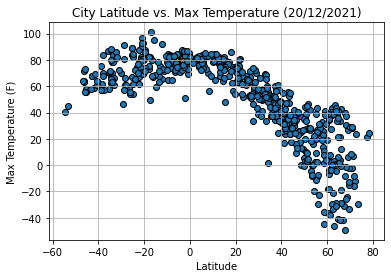

This scatter plot implies that cities closer to the equator (latitude 0) have higher maximum temperatures. As latitude from the equator increases, the maximum temperatures of cities decreases.


In [16]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors='k')

# Incorporate graph properties
today = datetime.date.today()
date_of_analysis = today.strftime("%d/%m/%Y")
plt.title(f"City Latitude vs. Max Temperature ({date_of_analysis})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1_CityLatitudevsMaxTemperature.png")

# Show plot
plt.show()

print("This scatter plot implies that cities closer to the equator (latitude 0) have higher maximum temperatures. As latitude from the equator increases, the maximum temperatures of cities decreases.")

## Latitude vs. Humidity Plot

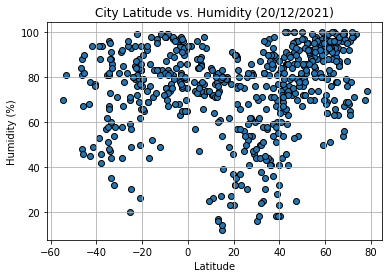

This scatter plot does not show as strong a correlation as the previous plot, however we can interpret that cities closer to the equator have lower humidities than those further away from the equator.


In [17]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors='k')

# Incorporate graph properties
plt.title(f"City Latitude vs. Humidity ({date_of_analysis})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2_CityLatitudevsHumidity.png")

# Show plot
plt.show()

print("This scatter plot does not show as strong a correlation as the previous plot, however we can interpret that cities closer to the equator have lower humidities than those further away from the equator.")

## Latitude vs. Cloudiness Plot

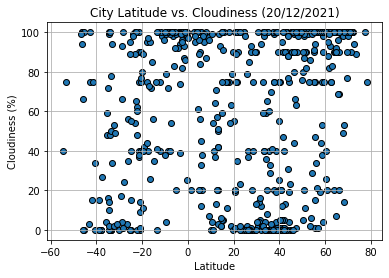

This scatter plot also does not show a strong correlation, however we can interpret that more cities closer to the equator have higher levels of cloudiness than those further away from the equator, which have low or no cloudiness.


In [18]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors='k')

# Incorporate graph properties
plt.title(f"City Latitude vs. Cloudiness ({date_of_analysis})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3_CityLatitudevsCloudiness.png")

# Show plot
plt.show()

print("This scatter plot also does not show a strong correlation, however we can interpret that more cities closer to the equator have higher levels of cloudiness than those further away from the equator, which have low or no cloudiness.")

## Latitude vs. Wind Speed Plot

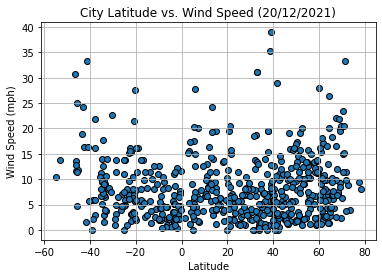

This scatter plot does not appear to show any strong correlation, however we can note that the highest wind speeds are in cities that are further away from the equator.


In [19]:
# Build a scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors='k')

# Incorporate graph properties
plt.title(f"City Latitude vs. Wind Speed ({date_of_analysis})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4_CityLatitudevsWindSpeed.png")

# Show plot
plt.show()

print("This scatter plot does not appear to show any strong correlation, however we can note that the highest wind speeds are in cities that are further away from the equator.")

## Linear Regression

In [21]:
# Create bins for northern and southern hemispheres and cut weather data into bins
hemisphere_bins = [-60,-0.05,85]
hemispheres = ["Southern Hemisphere", "Northern Hemisphere"]
weather_data["Hemisphere"] = pd.cut(weather_data["Lat"],hemisphere_bins,labels=hemispheres,include_lowest=True)

# Create seperate dataframes for northern and southern hemispheres
northern_hemisphere_weather_data = weather_data.loc[weather_data["Hemisphere"]=="Northern Hemisphere"]
southern_hemisphere_weather_data = weather_data.loc[weather_data["Hemisphere"]=="Southern Hemisphere"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8399342078705779


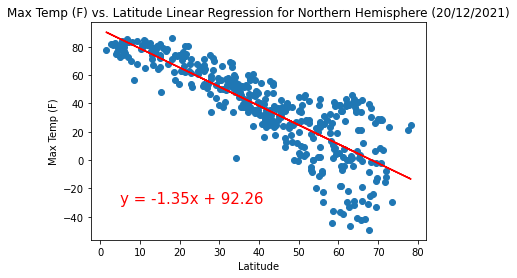

Max temperature and latitude in the northern hemisphere have a strong negative correlation, indicating that as latitude increases, maximum temperature decreases. This supports previous observations that maximum temperatures decrease for cities further away from the equator.


In [22]:
# Calculate the correlation coefficient and linear regression model for maximum temperature and latitude for northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_weather_data["Lat"],northern_hemisphere_weather_data["Max Temp"])
regress_values = northern_hemisphere_weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(northern_hemisphere_weather_data["Lat"],northern_hemisphere_weather_data["Max Temp"])
plt.plot(northern_hemisphere_weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,-30),fontsize=15,color="red")
plt.title(f"Max Temp (F) vs. Latitude Linear Regression for Northern Hemisphere ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the figure
plt.savefig("../output_data/Fig5_NorthernHemisphereLatitudevsMaxTemperature.png")

# Determine r-value
print(f"The r-value is: {rvalue}")

# Analysis
plt.show()
print("Max temperature and latitude in the northern hemisphere have a strong negative correlation, indicating that as latitude increases, maximum temperature decreases. This supports previous observations that maximum temperatures decrease for cities further away from the equator.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.42863757718160583


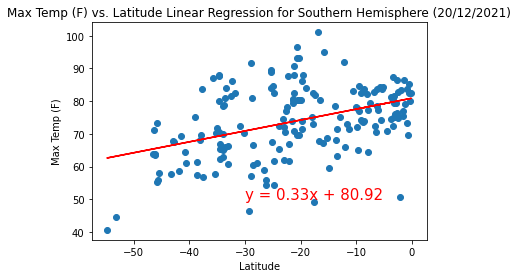

Max temperature and latitude in the southern hemisphere have a moderate positive correlation, indicating that as latitude increases, maximum temperature also slightly increases. This supports previous observations that maximum temperatures decrease for cities further away from the equator.


In [23]:
# Calculate the correlation coefficient and linear regression model for maximum temperature and latitude for southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_weather_data["Lat"],southern_hemisphere_weather_data["Max Temp"])
regress_values = southern_hemisphere_weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(southern_hemisphere_weather_data["Lat"],southern_hemisphere_weather_data["Max Temp"])
plt.plot(southern_hemisphere_weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title(f"Max Temp (F) vs. Latitude Linear Regression for Southern Hemisphere ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the figure
plt.savefig("../output_data/Fig6_SouthernHemisphereLatitudevsMaxTemperature.png")

# Determine r-value
print(f"The r-value is: {rvalue}")

# Analysis
plt.show()
print("Max temperature and latitude in the southern hemisphere have a moderate positive correlation, indicating that as latitude increases, maximum temperature also slightly increases. This supports previous observations that maximum temperatures decrease for cities further away from the equator.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3562341289012065


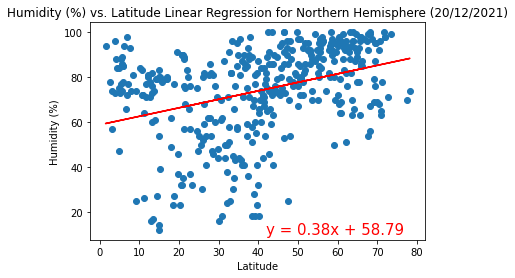

Humidity and latitude in the northern hemisphere have a weak-moderate positive correlation. This shows there is not a strong relationship between the two factors, however the data within this plot appears to show higher humidity for higher latitude values.


In [24]:
# Calculate the correlation coefficient and linear regression model for humidity and latitude for northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_weather_data["Lat"],northern_hemisphere_weather_data["Humidity"])
regress_values = northern_hemisphere_weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(northern_hemisphere_weather_data["Lat"],northern_hemisphere_weather_data["Humidity"])
plt.plot(northern_hemisphere_weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(42,10),fontsize=15,color="red")
plt.title(f"Humidity (%) vs. Latitude Linear Regression for Northern Hemisphere ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig7_NorthernHemisphereLatitudevsHumidity.png")

# Determine r-value
print(f"The r-value is: {rvalue}")

# Analysis
plt.show()
print("Humidity and latitude in the northern hemisphere have a weak-moderate positive correlation. This shows there is not a strong relationship between the two factors, however the data within this plot appears to show higher humidity for higher latitude values.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2961701161504299


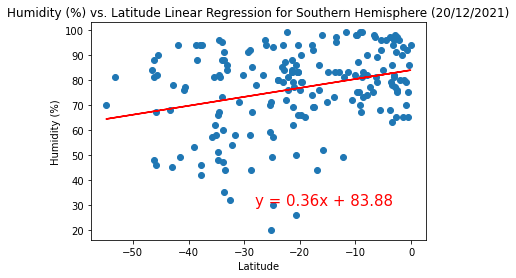

As above, humidity and latitude in the southern hemisphere have a weak positive correlation. This shows there is not a strong relationship between the two factors.


In [25]:
# Calculate the correlation coefficient and linear regression model for humidity and latitude for southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_weather_data["Lat"],southern_hemisphere_weather_data["Humidity"])
regress_values = southern_hemisphere_weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(southern_hemisphere_weather_data["Lat"],southern_hemisphere_weather_data["Humidity"])
plt.plot(southern_hemisphere_weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-28,30),fontsize=15,color="red")
plt.title(f"Humidity (%) vs. Latitude Linear Regression for Southern Hemisphere ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig8_SouthernHemisphereLatitudevsHumidity.png")

# Determine r-value
print(f"The r-value is: {rvalue}")

# Analysis
plt.show()
print("As above, humidity and latitude in the southern hemisphere have a weak positive correlation. This shows there is not a strong relationship between the two factors.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2866070265001546


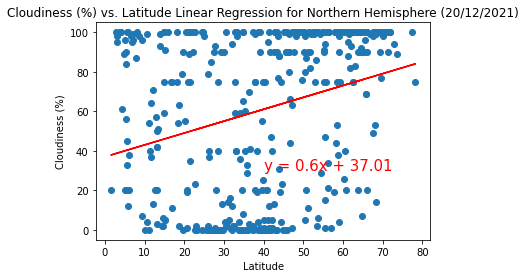

Cloudiness and latitude in the northern hemisphere have quite a weak positive correlation, showing there is not a strong relationship between the two factors.


In [26]:
# Calculate the correlation coefficient and linear regression model for cloudiness and latitude for northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_weather_data["Lat"],northern_hemisphere_weather_data["Cloudiness"])
regress_values = northern_hemisphere_weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(northern_hemisphere_weather_data["Lat"],northern_hemisphere_weather_data["Cloudiness"])
plt.plot(northern_hemisphere_weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title(f"Cloudiness (%) vs. Latitude Linear Regression for Northern Hemisphere ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig9_NorthernHemisphereLatitudevsCloudiness.png")

# Determine r-value
print(f"The r-value is: {rvalue}")

# Analysis
plt.show()
print("Cloudiness and latitude in the northern hemisphere have quite a weak positive correlation, showing there is not a strong relationship between the two factors.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.4788800362178918


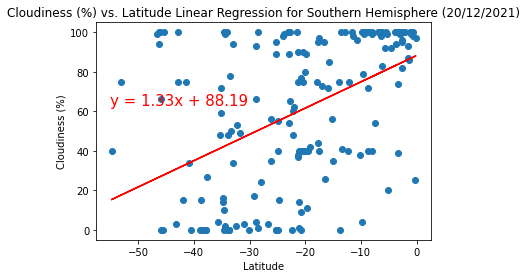

As above, this linear regression shows cloudiness and latitude in the southern hemisphere have quite a weak-moderate positive correlation, indicating there is not a strong relationship between the two factors.


In [27]:
# Calculate the correlation coefficient and linear regression model for cloudiness and latitude for southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_weather_data["Lat"],southern_hemisphere_weather_data["Cloudiness"])
regress_values = southern_hemisphere_weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(southern_hemisphere_weather_data["Lat"],southern_hemisphere_weather_data["Cloudiness"])
plt.plot(southern_hemisphere_weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,63),fontsize=15,color="red")
plt.title(f"Cloudiness (%) vs. Latitude Linear Regression for Southern Hemisphere ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig10_SouthernHemisphereLatitudevsCloudiness.png")

# Determine r-value
print(f"The r-value is: {rvalue}")

# Analysis
plt.show()
print("As above, this linear regression shows cloudiness and latitude in the southern hemisphere have quite a weak-moderate positive correlation, indicating there is not a strong relationship between the two factors.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09990708892837658


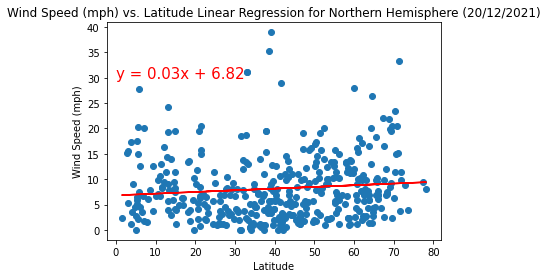

Wind speed and latitude in the northern hemisphere have essentially no correlation, with a very low r-value.


In [28]:
# Calculate the correlation coefficient and linear regression model for wind speed and latitude for northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere_weather_data["Lat"],northern_hemisphere_weather_data["Wind Speed"])
regress_values = northern_hemisphere_weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(northern_hemisphere_weather_data["Lat"],northern_hemisphere_weather_data["Wind Speed"])
plt.plot(northern_hemisphere_weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title(f"Wind Speed (mph) vs. Latitude Linear Regression for Northern Hemisphere ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save the figure
plt.savefig("../output_data/Fig11_NorthernHemisphereLatitudevsWindSpeed.png")

# Determine r-value
print(f"The r-value is: {rvalue}")

# Analysis
plt.show()
print("Wind speed and latitude in the northern hemisphere have essentially no correlation, with a very low r-value.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4333090679754946


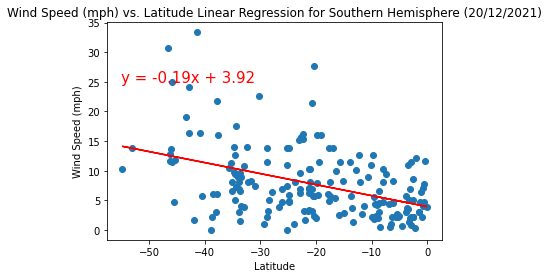

Wind speed and latitude in the southern hemisphere appear to have a moderate negative correlation, with an r-value of 0.44. This indicates that southern hemisphere cities closer to the equator have lower wind speed.


In [29]:
# Calculate the correlation coefficient and linear regression model for wind speed and latitude for southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere_weather_data["Lat"],southern_hemisphere_weather_data["Wind Speed"])
regress_values = southern_hemisphere_weather_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(southern_hemisphere_weather_data["Lat"],southern_hemisphere_weather_data["Wind Speed"])
plt.plot(southern_hemisphere_weather_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title(f"Wind Speed (mph) vs. Latitude Linear Regression for Southern Hemisphere ({date_of_analysis})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save the figure
plt.savefig("../output_data/Fig12_SouthernHemisphereLatitudevsWindSpeed.png")

# Determine r-value
print(f"The r-value is: {rvalue}")

# Analysis
plt.show()
print("Wind speed and latitude in the southern hemisphere appear to have a moderate negative correlation, with an r-value of 0.44. This indicates that southern hemisphere cities closer to the equator have lower wind speed.")